In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Dataset

In [2]:
df=pd.read_csv("Customers.csv")
df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [5]:
df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
import datetime as dt

In [8]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

In [9]:
df['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='count'>

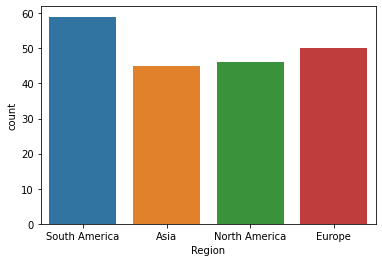

In [10]:
sns.countplot(x='Region',data=df)

In [11]:
import datetime as dt
df['Signup_month']=df['SignupDate'].dt.month
df['Signup_year']=df['SignupDate'].dt.year

In [12]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,Signup_month,Signup_year
0,C0001,Lawrence Carroll,South America,2022-07-10,7,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2,2022
2,C0003,Michael Rivera,South America,2024-03-07,3,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,10,2022
4,C0005,Laura Weber,Asia,2022-08-15,8,2022


In [13]:
df['Signup_year'].value_counts()

2024    79
2022    64
2023    57
Name: Signup_year, dtype: int64

In [14]:
df.corr()

,Signup_month,Signup_year
Signup_month,1.000000,-0.014296
Signup_year,-0.014296,1.000000


# Products Dataset

In [15]:
df1=pd.read_csv("Products.csv")
df1

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [16]:
df1.shape

(100, 4)

In [17]:
df1.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [18]:
df1.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [19]:
df1.duplicated().sum()

0

In [20]:
df1['Price']=pd.to_numeric(df1['Price'],errors='coerce')

In [21]:
df1['Category'].value_counts()

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

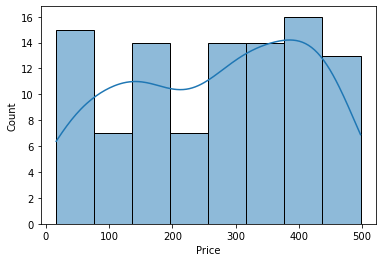

In [22]:
sns.histplot(df1['Price'],kde=True)

<AxesSubplot:xlabel='Price'>

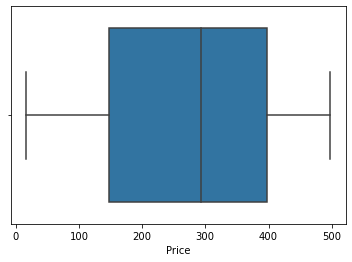

In [23]:
sns.boxplot(x=df1['Price'])

<AxesSubplot:xlabel='Category', ylabel='count'>

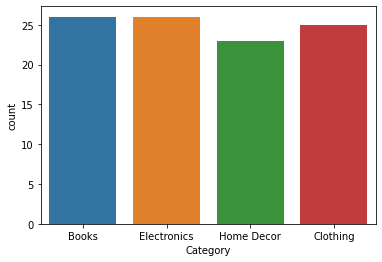

In [24]:
sns.countplot(x='Category',data=df1)

In [25]:
df1.groupby('Category')['Price'].mean().sort_values(ascending=False)

Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64

# Transaction Dataset

In [26]:
df2=pd.read_csv('Transactions.csv')
df2

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [27]:
df2.shape

(1000, 7)

In [28]:
df2.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [29]:
df2.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [30]:
df2['TransactionDate'] = pd.to_datetime(df2['TransactionDate'])

<AxesSubplot:xlabel='TotalValue', ylabel='Count'>

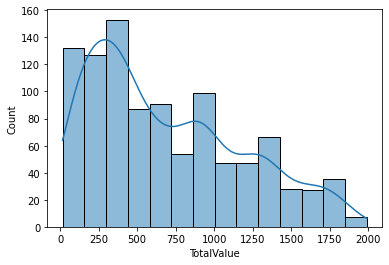

In [31]:
sns.histplot(df2['TotalValue'], kde=True)

<AxesSubplot:xlabel='TotalValue'>

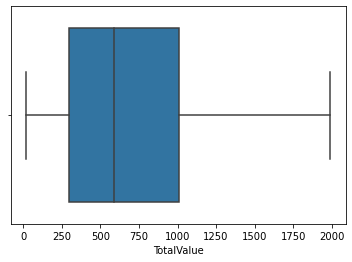

In [32]:
sns.boxplot(x=df2['TotalValue'])

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

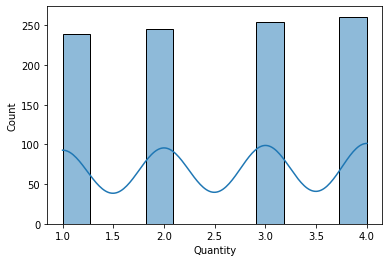

In [33]:
sns.histplot(df2['Quantity'], kde=True)

In [34]:
df2['AvgPrice']=df2['TotalValue']/df2['Quantity']
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,AvgPrice
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,300.68


In [35]:
df2[['Quantity', 'TotalValue', 'Price']].corr()

,Quantity,TotalValue,Price
Quantity,1.000000,0.609972,-0.009378
TotalValue,0.609972,1.000000,0.722714
Price,-0.009378,0.722714,1.000000


# Join All the Tables

In [37]:
df3=df2.merge(df,on='CustomerID',how='inner')
df3=df2.merge(df1,on='ProductID',how='inner')

In [38]:
df3

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,AvgPrice,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,459.86,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,459.86,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,459.86,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,459.86,SoundWave Smartwatch,Electronics,459.86


In [39]:
df3.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
AvgPrice           0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [40]:
df3.shape

(1000, 11)

In [43]:
df3.drop(['Price_y'],axis=1)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,AvgPrice,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,459.86,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,459.86,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,459.86,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,459.86,SoundWave Smartwatch,Electronics


In [48]:
df3['Category'].value_counts()

Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: Category, dtype: int64

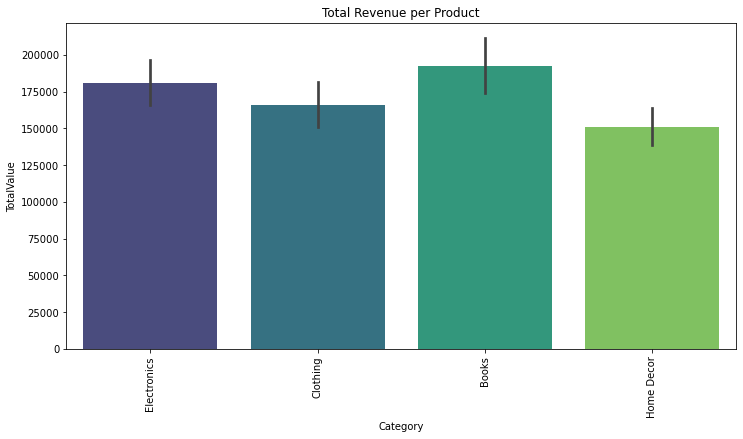

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='TotalValue', data=df3, estimator=np.sum, palette='viridis')
plt.title('Quantity Distribution by Category')
plt.xticks(rotation=90)
plt.show()


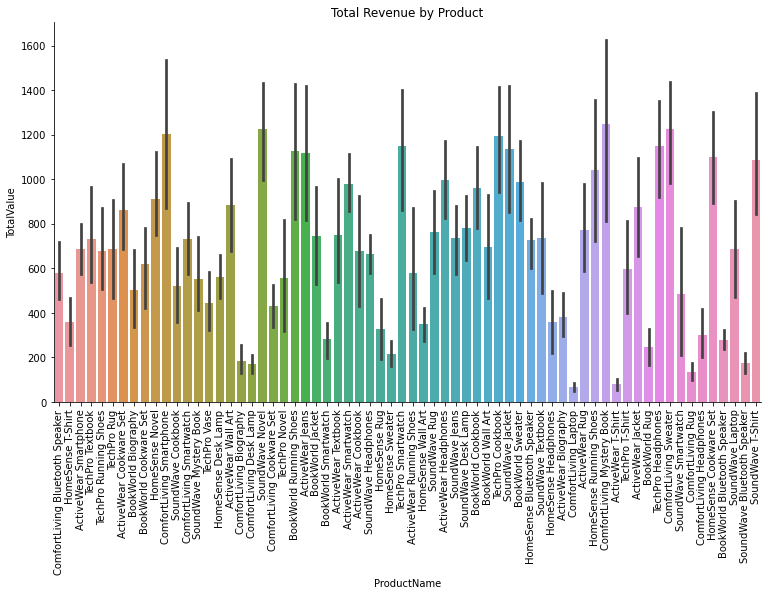

In [55]:
sns.catplot(x='ProductName', y='TotalValue', kind='bar', data=df3, height=6, aspect=2)
plt.title('Total Revenue by Product')
plt.xticks(rotation=90)
plt.show()

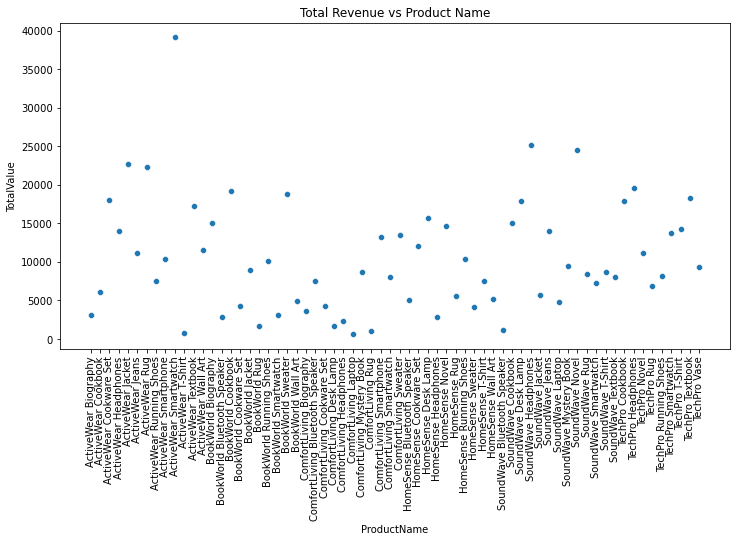

In [57]:
product_revenue = df3.groupby('ProductName')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='ProductName', y='TotalValue', data=product_revenue, palette='viridis')
plt.title('Total Revenue vs Product Name')
plt.xticks(rotation=90)
plt.show()

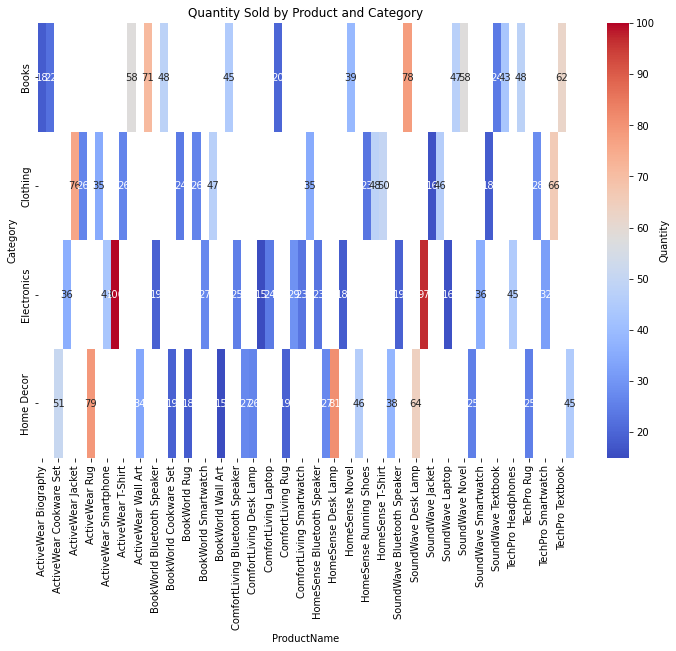

In [58]:
product_category_quantity = df3.pivot_table(values='Quantity', index='Category', columns='ProductName', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(product_category_quantity, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Quantity'})
plt.title('Quantity Sold by Product and Category')
plt.show()